<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [48]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

import statsmodels.api as sm

%matplotlib inline

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [49]:
# Read in the citibike data in the data folder in this repository.
citibike = pd.read_csv('data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [50]:
# Check first five rows.
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [51]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [52]:
citibike.describe(include='all')

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736,224736,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736,224736.000000
unique,NaN,204437,204781,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,78,NaN
top,NaN,2014-02-11 08:50:10,2014-02-25 08:47:55,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Subscriber,1985,NaN
freq,NaN,7,6,NaN,2920,NaN,NaN,NaN,2622,NaN,NaN,NaN,218019,9305,NaN
mean,874.519810,NaN,NaN,439.203479,NaN,40.734366,-73.990386,440.741995,NaN,40.734221,-73.990521,18010.598222,NaN,NaN,1.154617
std,5486.092219,NaN,NaN,335.723861,NaN,0.019031,0.011853,341.497433,NaN,0.019048,0.011920,1987.769335,NaN,NaN,0.436592
min,60.000000,NaN,NaN,72.000000,NaN,40.680342,-74.017134,72.000000,NaN,40.680342,-74.017134,14529.000000,NaN,NaN,0.000000
25%,360.000000,NaN,NaN,305.000000,NaN,40.721854,-73.998522,305.000000,NaN,40.721816,-73.999061,16302.000000,NaN,NaN,1.000000
50%,544.000000,NaN,NaN,403.000000,NaN,40.736197,-73.990617,403.000000,NaN,40.735877,-73.990741,17975.000000,NaN,NaN,1.000000
75%,845.000000,NaN,NaN,490.000000,NaN,40.749156,-73.981918,488.000000,NaN,40.749013,-73.981948,19689.000000,NaN,NaN,1.000000


In [53]:
citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [54]:
ttest_ind(citibike[citibike['gender'] == 1]['tripduration'], 
          citibike[citibike['gender'] == 2]['tripduration'])

TtestResult(statistic=-5.929304472651931, pvalue=3.046762685660303e-09, df=218003.0)

**Answer**: Our $t$-statistic is -5.93 and our $p$-value is very, very small. Because $p$ is smaller than $\alpha$, we reject our null hypothesis and accept that $\mu_1 \neq \mu_2$. This means that we accept that the average trip duration is different for `gender=1` and `gender=2`.

## What numeric columns shouldn't be treated as numeric?

**Answer:** `start station id`, `end station id`, and `bikeid`

## Dummify the `start station id` Variable

In [55]:
citibike = pd.get_dummies(citibike,columns=['start station id'],drop_first=True)
citibike.head()


,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,False,False,False,False,False,False,False,False,False,False
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,False
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,False,False,False,False,False,False,False,False,False,False
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,False,False,False,False,False,False,False,False,False,False
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,False


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [56]:
# to check the dtype of the birth year column
print(citibike['birth year'].dtype)

object


In [57]:
# create a function to convert the numeric string to integer and non numeric to zero
def calc_age(i):
    try:
        return 2014 - int(i) #try to covert object to string if it is a numeric string
    except:
        return np.nan #return NaN if it is not a numeric string

citibike['age'] = citibike['birth year'].apply(calc_age)

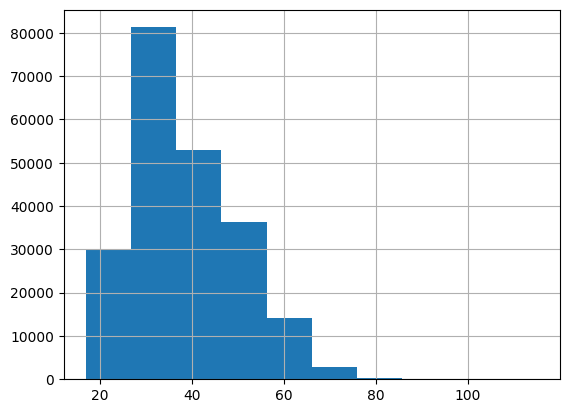

In [58]:
# quick overview of all age distrubition with histogram
citibike['age'].hist();

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [59]:
# check for the data type for X variable
print(citibike['age'].dtype)
print(citibike['usertype'].dtype)
print(citibike['gender'].dtype)

float64
object
int64


In [60]:
#get_dummies for usertype because its not numeric column
citibike = pd.get_dummies(citibike, columns = ['usertype'], drop_first = True)

In [61]:
# drop the unnecessary column for X variable and drop the na from tripduration for Y
X_train, X_test, y_train, y_test = train_test_split(citibike.dropna().drop(columns=['tripduration', 'birth year', 'bikeid',
                                                                           'end station longitude', 'end station latitude',
                                                                           'end station name', 'end station id',
                                                                           'start station longitude', 'start station latitude',
                                                                           'start station name', 'starttime', 'stoptime']),
                                                    citibike.dropna()['tripduration'],
                                                    test_size=0.2,
                                                    random_state=123)

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [62]:
# Instantiate the model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(X_train, y_train)

# Step 3. Generate predictions.
preds = lr.predict(X_test)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [63]:
print(f'MSE on training set: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'MSE on testing set: {mean_squared_error(y_test, preds)}')

MSE on training set: 33236295.991138194
MSE on testing set: 16855069.419826765


In [64]:
print(f'R^2 on training set: {r2_score(y_train, lr.predict(X_train))}')
print(f'R^2 on testing set: {r2_score(y_test, preds)}')

R^2 on training set: 0.003732147945244124
R^2 on testing set: -0.004823021824723384


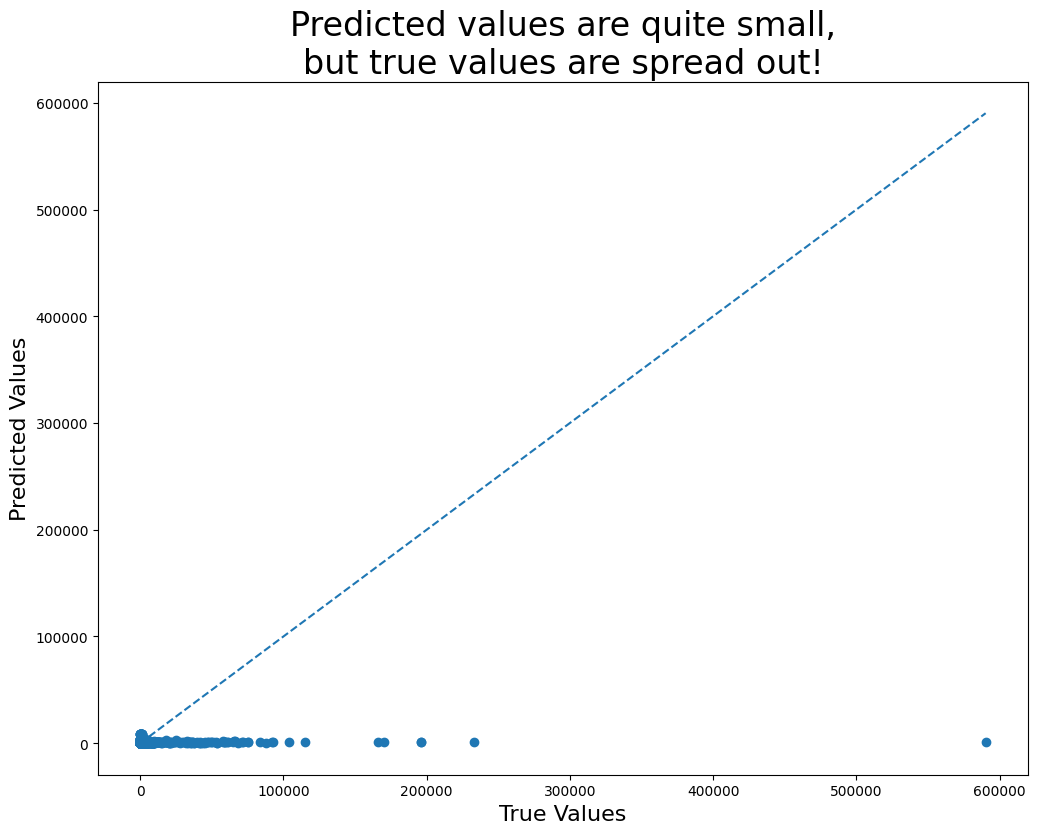

In [65]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(y_test, preds)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(preds))],
         [0, max(max(y_test),max(preds))],
         linestyle = '--')

plt.title('Predicted values are quite small,\nbut true values are spread out!', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

In [66]:
print(f'MSE of baseline model: {mean_squared_error(y_test, [np.mean(y_train)] * len(y_test))}')

MSE of baseline model: 16778197.42995127


In [67]:
print(f'R^2 of baseline model: {r2_score(y_test, [np.mean(y_train)] * len(y_test))}')

R^2 of baseline model: -0.00024026139601152074


## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [68]:
X_train = sm.add_constant(X_train)

In [70]:
X_train = X_train.astype(float)
y_train = pd.to_numeric(y_train)

In [71]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [72]:
model_sm = sm.OLS(y_train, X_train).fit()

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [73]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.976
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.64e-23
Time:                        14:18:09   Log-Likelihood:            -1.7578e+06
No. Observations:              174415   AIC:                         3.516e+06
Df Residuals:                  174084   BIC:                         3.520e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        339.1261    131.765      2.574      0.010      80.870     597.382
x1           178.9245     35.542      5.034      0.000     109.263     248.586
x2            20.4768    361.912      0.057      0.955    -688.863     729.816
x3          -455.1307    477.240     -0.954      0.340   -1390.511     480.250
x4          -218.9387    461.841     -0.474      0.635   -1124.136     686.259
x5          -405.8722    309.906     -1.310      0.190   -1013.280     201.536
x6          -347.9569    936.814     -0.371      0.710   -2184.091    1488.178
x7           897.8401    717.844      1.251      0.211    -509.117    2304.798
x8          -355.4668    326.278     -1.089      0.276    -994.965     284.031
x9          -359.5798    322.725     -1.114      0.265    -992.113     272.954
x10         -379.0678    387.621     -0.978      0.328   -1138.797     380.661
x11         -359.2094    541.642     -0.663      0.507   -1420.816     702.397
x12         -146.8196    754.903     -0.194      0.846   -1626.413    1332.774
x13         -473.3493    380.990     -1.242      0.214   -1220.082     273.383
x14          -60.8850    334.087     -0.182      0.855    -715.688     593.918
x15          136.6086    376.197      0.363      0.717    -600.729     873.946
x16         -412.1857    298.295     -1.382      0.167    -996.836     172.465
x17         -449.3211    421.209     -1.067      0.286   -1274.881     376.239
x18         -379.8976    327.232     -1.161      0.246   -1021.265     261.469
x19          146.4076    443.749      0.330      0.741    -723.331    1016.147
x20         -280.2529    366.384     -0.765      0.444    -998.358     437.852
x21         -453.7822    316.617     -1.433      0.152   -1074.344     166.780
x22         -280.4457    359.974     -0.779      0.436    -985.986     425.095
x23         -269.9957    334.759     -0.807      0.420    -926.116     386.125
x24         -322.8253    309.416     -1.043      0.297    -929.274     283.623
x25         -378.8441    331.655     -1.142      0.253   -1028.881     271.193
x26          316.0947    343.506      0.920      0.357    -357.169     989.358
x27          397.4999    355.838      1.117      0.264    -299.935    1094.935
x28         -302.5893    329.713     -0.918      0.359    -948.820     343.641
x29         -245.3537    799.650     -0.307      0.759   -1812.649    1321.942
x30          -82.6458    726.507     -0.114      0.909   -1506.583    1341.292
x31          267.1461    776.133      0.344      0.731   -1254.056    1788.348
x32         -192.9382    338.352     -0.570      0.569    -856.100     470.223
x33         -417.6083    391.955     -1.065      0.287   -1185.831     350.614
x34          -60.0338    446.136     -0.135      0.893    -934.451     814.384
x35         -326.4154    361.723     -0.902      0.367   -1035.384     382.553
x3

**Answer**: Age is significant predictor of trip duration

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

**Answer:** The modeling is not good enough